# 二、階層式分群

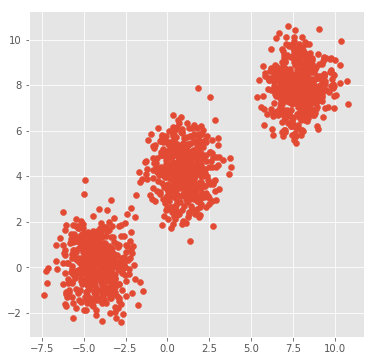

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('ggplot')
%matplotlib inline

plt.figure(figsize=(6, 6))

n_samples = 1500
random_state = 3
X, y = make_blobs(n_samples=n_samples, random_state=random_state) #隨機產生集群

plt.scatter(X[:, 0], X[:, 1])

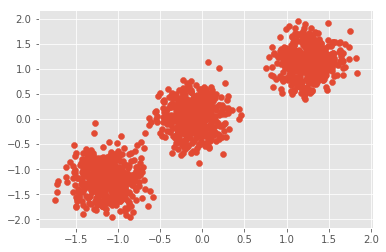

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)
plt.scatter(X_std[:, 0], X_std[:, 1])

## 凝聚分層分群 by Scikit-Learn

In [3]:
from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(linkage='ward',n_clusters=3)
y_pred = aggc.fit_predict(X_std)

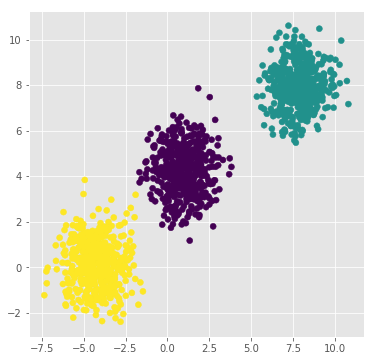

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

## 凝聚分層分群&階層樹狀圖 by Scipy

#### scipy.cluster.hierarchy.linkage
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
#### scipy.cluster.hierarchy.dendrogram
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [ ]:
!pip install scipy

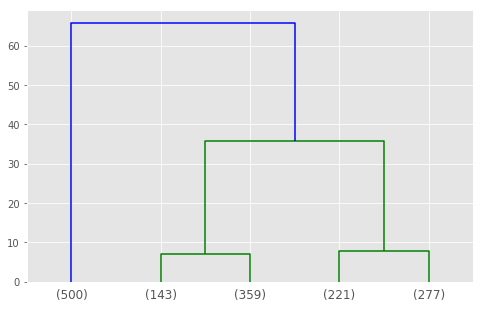

In [5]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(8, 5))
linkage_matrix = linkage(X_std, "ward")

# p: 集群數
# truncate_mode: 階層樹太大可讀性低，因此可以利用此參數裁剪
# show_leaf_counts: 顯示leaf分群數量
tree = dendrogram(linkage_matrix, p=5, truncate_mode='lastp', show_leaf_counts=True)

plt.show()


# 三、DBSCAN

In [60]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('ggplot')
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
n_samples = 1500
X1, y1 = datasets.make_blobs(n_samples=n_samples, random_state=8)
X_1, y_1 = datasets.make_swiss_roll(n_samples=n_samples, noise=.05)
X2, y2 = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
X3, y3 = datasets.make_moons(n_samples=n_samples, noise=.05)
X4, y4 = datasets.make_s_curve(n_samples=n_samples, noise=.05)

In [20]:
print(X_1)
print(y_1)

[[  0.65880573   6.76536329 -11.00178633]
 [  3.68779873  12.23162169   6.36882792]
 [ -3.47796344  19.44554188 -10.12815264]
 ...
 [ -3.84828588   0.1019312    7.50434146]
 [ 12.40276741   4.15390051   2.956029  ]
 [ 12.591831    13.36897817  -0.08520375]]
[11.05489015  7.32558521 10.66186104 ...  8.32595221 12.79740873
 12.55910035]


In [61]:
sc = StandardScaler()
X1_std = sc.fit_transform(X1)
X2_std = sc.fit_transform(X2)
X3_std = sc.fit_transform(X3)
X_1_std = sc.fit_transform(X_1)
X4_std = sc.fit_transform(X4)

## 一般圓狀

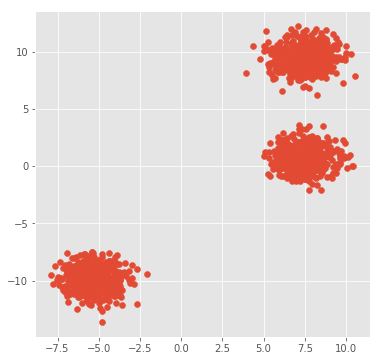

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(X1[:, 0], X1[:, 1])

#### 可調整：eps(半徑)、min_samples(半徑內最少邊緣點數量)

In [89]:
X1_std

array([[ 0.43868549,  1.0189435 ],
       [ 0.39707363,  1.24042045],
       [ 0.66127051,  1.30549689],
       ...,
       [ 0.74515992,  1.35339121],
       [-1.28031739, -1.22959089],
       [-1.09494672, -1.18028397]])

In [63]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X1_std)

from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(linkage='ward',n_clusters=3)
y_pred_aggc = aggc.fit_predict(X1_std)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_pred_km = km.fit_predict(X1_std)

Text(0.5,1,'KMeans')

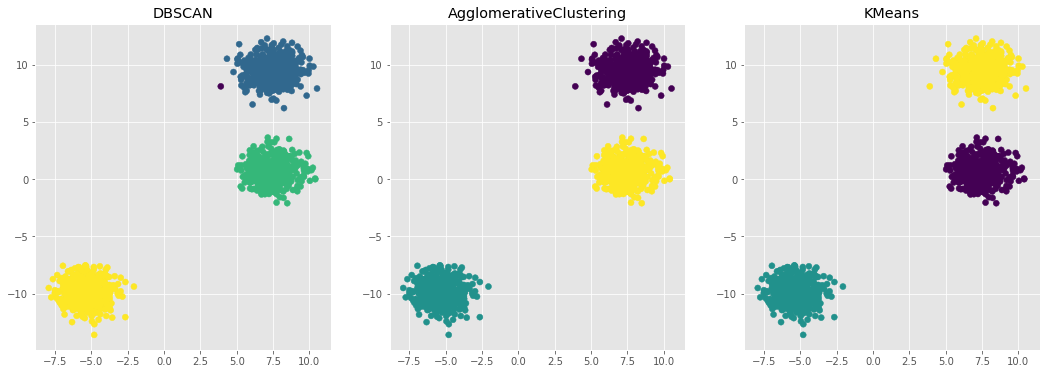

In [64]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.scatter(X1[:, 0], X1[:, 1], c=y_pred_dbscan)
plt.title('DBSCAN')

plt.subplot(132)
plt.scatter(X1[:, 0], X1[:, 1], c=y_pred_aggc)
plt.title('AgglomerativeClustering')

plt.subplot(133)
plt.scatter(X1[:, 0], X1[:, 1], c=y_pred_km)
plt.title('KMeans')

## Swiss

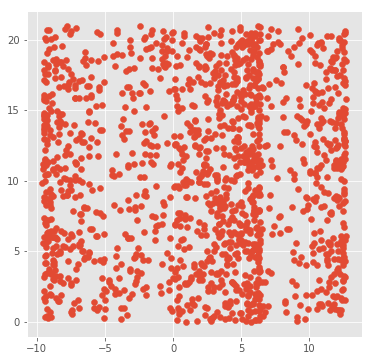

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(X_1[:, 0], X_1[:, 1])

In [66]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X_1_std)

from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(linkage='ward',n_clusters=10)
y_pred_aggc = aggc.fit_predict(X_1_std)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
y_pred_km = km.fit_predict(X_1_std)

Text(0.5,1,'KMeans')

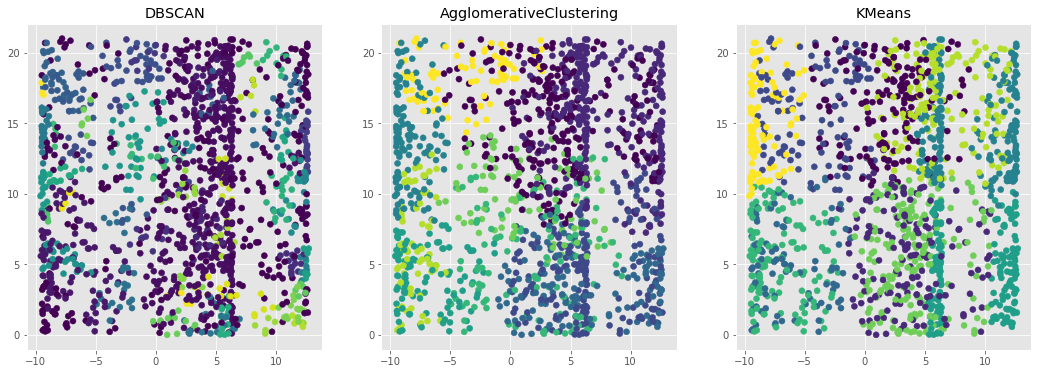

In [67]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_pred_dbscan)
plt.title('DBSCAN')

plt.subplot(132)
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_pred_aggc)
plt.title('AgglomerativeClustering')

plt.subplot(133)
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_pred_km)
plt.title('KMeans')

## S Curve

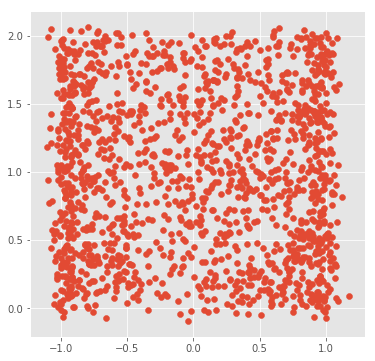

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(X4[:, 0], X4[:, 1])

In [80]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_pred_dbscan = dbscan.fit_predict(X4_std)

from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(linkage='ward',n_clusters=10)
y_pred_aggc = aggc.fit_predict(X4_std)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
y_pred_km = km.fit_predict(X4_std)

Text(0.5,1,'KMeans')

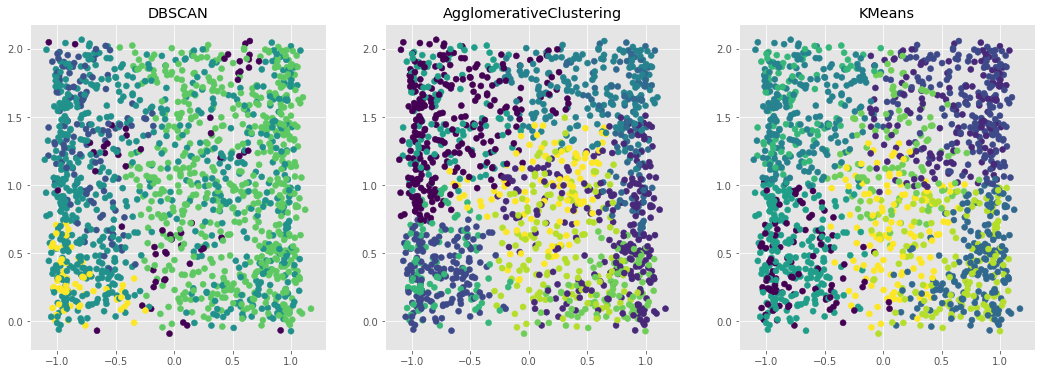

In [81]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.scatter(X4[:, 0], X4[:, 1], c=y_pred_dbscan)
plt.title('DBSCAN')

plt.subplot(132)
plt.scatter(X4[:, 0], X4[:, 1], c=y_pred_aggc)
plt.title('AgglomerativeClustering')

plt.subplot(133)
plt.scatter(X4[:, 0], X4[:, 1], c=y_pred_km)
plt.title('KMeans')

## 甜甜圈形

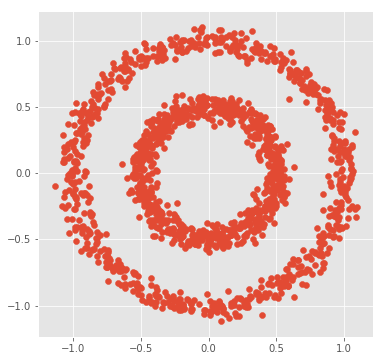

In [82]:
plt.figure(figsize=(6,6))
plt.scatter(X2[:, 0], X2[:, 1])

In [84]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X2_std)

from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(linkage='ward',n_clusters=3)
y_pred_aggc = aggc.fit_predict(X2_std)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_pred_km = km.fit_predict(X2_std)

Text(0.5,1,'KMeans')

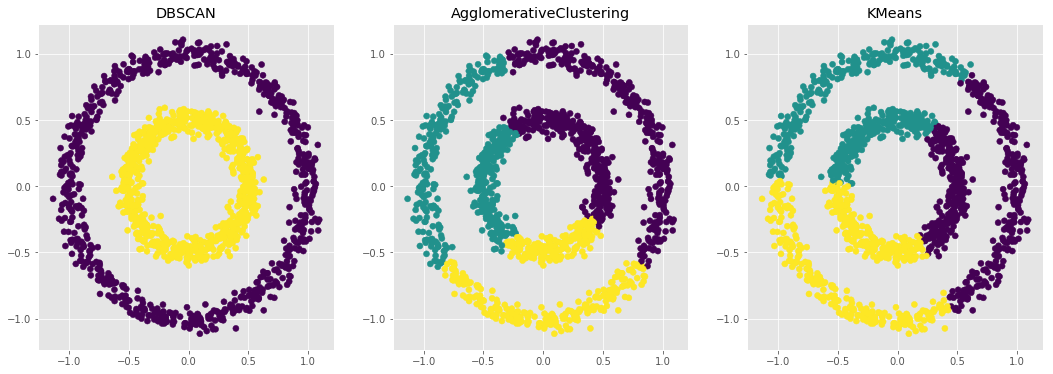

In [85]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.scatter(X2[:, 0], X2[:, 1], c=y_pred_dbscan)
plt.title('DBSCAN')

plt.subplot(132)
plt.scatter(X2[:, 0], X2[:, 1], c=y_pred_aggc)
plt.title('AgglomerativeClustering')

plt.subplot(133)
plt.scatter(X2[:, 0], X2[:, 1], c=y_pred_km)
plt.title('KMeans')

## 半月形

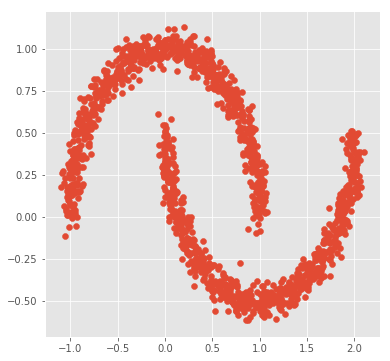

In [86]:
plt.figure(figsize=(6,6))
plt.scatter(X3[:, 0], X3[:, 1])

In [87]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X3_std)

from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(linkage='ward',n_clusters=3)
y_pred_aggc = aggc.fit_predict(X3_std)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_pred_km = km.fit_predict(X3_std)

Text(0.5,1,'KMeans')

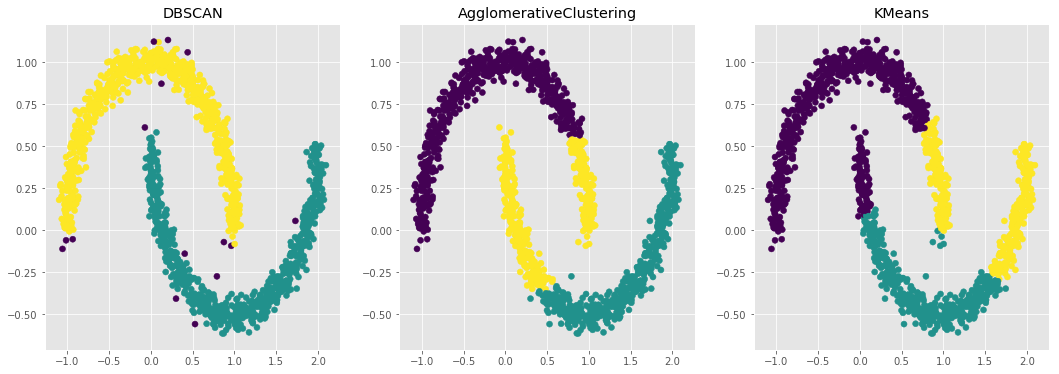

In [88]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.scatter(X3[:, 0], X3[:, 1], c=y_pred_dbscan)
plt.title('DBSCAN')

plt.subplot(132)
plt.scatter(X3[:, 0], X3[:, 1], c=y_pred_aggc)
plt.title('AgglomerativeClustering')

plt.subplot(133)
plt.scatter(X3[:, 0], X3[:, 1], c=y_pred_km)
plt.title('KMeans')